In [88]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


matplotlib.rcParams.update({"legend.frameon": False, "axes.spines.right": False, "axes.spines.top": False})
matplotlib.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": "CMU Serif"})

## Varying correlation factor

In [89]:
df = pd.read_json("../data/correlation/results.jsonl", lines=True)
df

,n,n_repetitions,corr_factor,shuffle,k,k_per_bucket,interleaved,k_mul,recall_mean,recall_std
0,2048,100,0.0,False,256,1,False,1,0.657500,0.017193
1,2048,100,0.0,False,256,2,False,1,0.750078,0.017131
2,2048,100,0.0,False,256,4,False,1,0.820977,0.016841
3,2048,100,0.0,False,256,8,False,1,0.871875,0.015625
4,2048,100,0.0,False,256,1,True,1,0.656563,0.020510
...,...,...,...,...,...,...,...,...,...,...
155,2048,100,0.9,True,256,8,False,1,0.874180,0.018299
156,2048,100,0.9,True,256,1,True,1,0.656641,0.016115
157,2048,100,0.9,True,256,2,True,1,0.747617,0.018671
158,2048,100,0.9,True,256,4,True,1,0.819102,0.017764


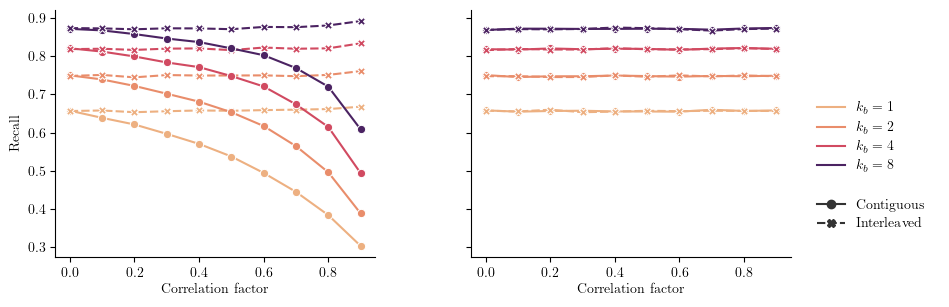

In [90]:
# Left: original correlated data, Right: data after random permutation

palette = sns.color_palette("flare", as_cmap=True)
g = sns.relplot(
    data=df,
    x="corr_factor",
    y="recall_mean",
    hue="k_per_bucket",
    col="shuffle",
    style="interleaved",
    kind="line",
    markers=True,
    palette=palette,
)
g.figure.set_size_inches(9, 3)
g.figure.subplots_adjust(wspace=0.3) # breathing space for columns
g.set_axis_labels("Correlation factor", "Recall")
g.set_titles(col_template="")

g.legend.set_bbox_to_anchor((1.05, 0.5))
for t in g.legend.get_texts():
    text = t.get_text()
    if text in ["k_per_bucket", "interleaved"]:
        t.set_visible(False)
    if text.isnumeric():
        t.set_text(f"$k_b = {text}$")
    if text == "False":
        t.set_text("Contiguous")
    if text == "True":
        t.set_text("Interleaved")

plt.savefig("figures/appendix-correlation-sim.pdf", bbox_inches="tight")

## SparQ results (interleaved vs contiguous)

In [91]:
df1 = pd.read_json("../data/sparq_v1.jsonl", lines=True)

In [92]:
df1 = df1[(df1["task_name"] == "repetition") & (df1["topk_k_per_bucket"].isin([1, 2, 4, 8]))]

In [93]:
df2 = pd.read_json("../data/sparq_v2.jsonl", lines=True)
df2 = df2[(df2["task_name"] == "squad") & (df2["topk_k_per_bucket"].isin([1, 2, 4, 8]))]

In [94]:
df = pd.concat([df1, df2])
df["topk_interleaved"] = df["topk_interleaved"].astype(bool)
df

,prefill_length,task_name,k,bucket_topk,topk_k_per_bucket,topk_interleaved,topk_k_mult,score,cost
64,1658.7040,repetition,96,True,8.0,False,1.0,208.05400,6634.8160
65,1658.7040,repetition,96,True,8.0,True,1.0,211.39600,6634.8160
66,1658.7040,repetition,96,True,4.0,False,1.0,190.11400,4976.1120
67,1658.7040,repetition,96,True,4.0,True,1.0,210.00000,4976.1120
68,1658.7040,repetition,96,True,2.0,False,1.0,166.61200,3317.4080
...,...,...,...,...,...,...,...,...,...
27,1408.9925,squad,96,True,8.0,True,1.0,0.81000,5635.9700
28,1408.9925,squad,96,True,8.0,False,2.0,0.80925,7092.2828
29,1408.9925,squad,96,True,8.0,True,2.0,0.81025,7092.2828
30,1408.9925,squad,96,True,8.0,True,4.0,0.81025,8548.5956


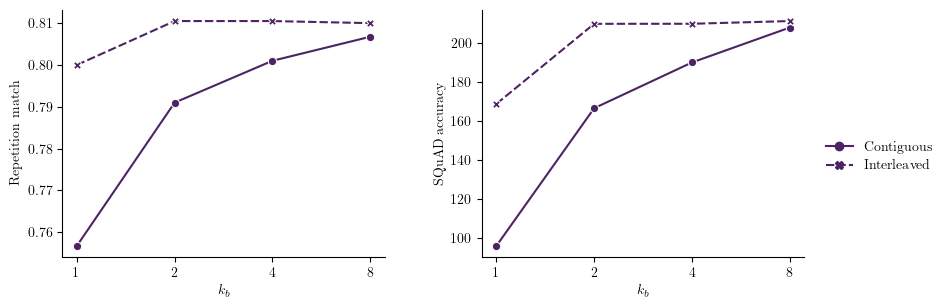

In [95]:
# Left: Repetition, Right: SQuAD
# Only use k_mult == 1

palette = sns.color_palette("flare", as_cmap=True)
g = sns.relplot(
    data=df[df["topk_k_mult"] == 1],
    x="topk_k_per_bucket",
    y="score",
    style="topk_interleaved",
    col="task_name",
    col_order=["squad", "repetition"],
    kind="line",
    markers=True,
    color=palette(0.99),
    facet_kws={"sharey": False},
)
g.figure.set_size_inches(9, 3)
g.figure.subplots_adjust(wspace=0.3) # breathing space for columns
g.set_axis_labels(x_var="$k_b$")
for i, ax in enumerate(g.axes.flat):
    ylabel = ["Repetition match", "SQuAD accuracy"]
    ax.set_xscale("log", base=2)
    ax.set_xticks([1, 2, 4, 8])
    ax.set_xticklabels([1, 2, 4, 8])
    ax.set_title("")
    ax.set_ylabel(ylabel[i])

g.legend.set_bbox_to_anchor((1.05, 0.5))
g.legend.set_title("")
for t in g.legend.get_texts():
    text = t.get_text()
    if text == "False":
        t.set_text("Contiguous")
    if text == "True":
        t.set_text("Interleaved")

plt.savefig("figures/appendix-correlation-sparq.pdf", bbox_inches="tight")

## SparQ timings: interleaved vs contiguous

In [96]:
# Alberto's timings

df_t = pd.read_json("../data/measure_speed_sparq_multi2.jsonl", lines=True)
df_t['interleaved'] = df_t['args'].apply(lambda x: x['interleaved'])

In [97]:
import numpy as np

def get_time(topk_size: int, j: int, k_mult: int, interleaved: bool) -> float:
    durations = df_t.loc[
        (df_t["topk_size"] == topk_size)
        & (df_t["j"] == j)
        & (df_t["k_mult"] == k_mult)
        & (df_t["interleaved"] == interleaved),
        "duration",
    ].values
    if durations.size > 0:
        return np.mean(durations[0])
    else:
        return None
    
df["duration"] = df.apply(
    lambda row: get_time(
        round(row["prefill_length"]),
        row["topk_k_per_bucket"],
        row["topk_k_mult"],
        row["topk_interleaved"],
    ),
    axis=1
)
df["topk_k_mult"] = df["topk_k_mult"].astype(int)

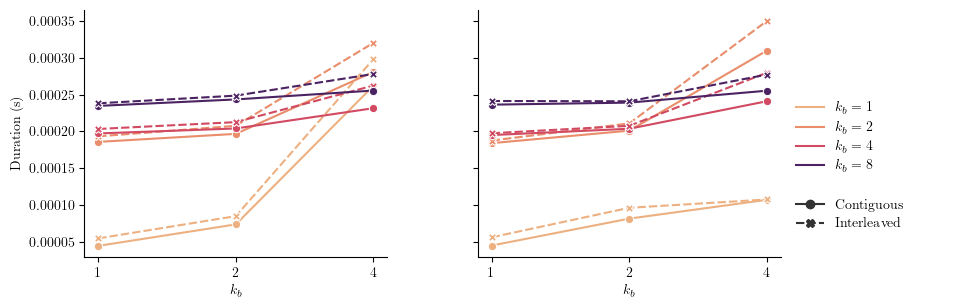

In [98]:
g = sns.relplot(
    df,
    x="topk_k_per_bucket",
    y="duration",
    style="topk_interleaved",
    hue="topk_k_mult",
    kind="line",
    markers=True,
    col="task_name",
    col_order=["squad", "repetition"],
    palette=palette,
)

g.figure.set_size_inches(9, 3)
g.figure.subplots_adjust(wspace=0.3)  # breathing space for columns
g.set_axis_labels("$k_b$", "Duration (s)")

for i, ax in enumerate(g.axes.flat):
    ax.set_xscale("log", base=2)
    ax.set_xticks([1, 2, 4])
    ax.set_xticklabels([1, 2, 4])
    ax.set_title("")

g.legend.set_bbox_to_anchor((1.05, 0.5))
for t in g.legend.get_texts():
    text = t.get_text()
    if text in ["topk_k_mult", "topk_interleaved"]:
        t.set_visible(False)
    if text.isnumeric():
        t.set_text(f"$k_b = {text}$")
    if text == "False":
        t.set_text("Contiguous")
    if text == "True":
        t.set_text("Interleaved")